# Regression by Hand

In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('data/test.csv')
data = df.copy()
data.head()

,Epoch,Fancy Words,Distance
0,0,2.0,28.283114
1,1,4.0,16.273221
2,2,6.0,7.049490
3,3,8.0,6.414362
4,4,10.0,8.829106


In [41]:
# Add Bias for Theta 0 and Remove Epoch
data = pd.concat([pd.Series(1, index=df.index, name='00'), data], axis=1)
data = data.drop(columns='Epoch')
data.head()

,00,Fancy Words,Distance
0,1,2.0,28.283114
1,1,4.0,16.273221
2,1,6.0,7.049490
3,1,8.0,6.414362
4,1,10.0,8.829106


In [42]:
# y = output
# X = input

y = data['Distance']
X = data.drop(columns='Distance')
X.head()

,00,Fancy Words
0,1,2.0
1,1,4.0
2,1,6.0
3,1,8.0
4,1,10.0


In [43]:
# Takes exponents of "Fancy Words" for normalization
X['Fancy Words1'] = X['Fancy Words']**2
X['Fancy Words2'] = X['Fancy Words']**3
X.head()

,00,Fancy Words,Fancy Words1,Fancy Words2
0,1,2.0,4.0,8.0
1,1,4.0,16.0,64.0
2,1,6.0,36.0,216.0
3,1,8.0,64.0,512.0
4,1,10.0,100.0,1000.0


In [44]:
# Normalizes the data
m = len(X)
X = X/X.max()

In [45]:
# Uses X and theta to predict y
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

In [46]:
# Cost function to calc Cost
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return np.sum(np.sqrt((y1-y)**2))/(2*m)

In [47]:
# Keeps updating theta values until optimal cost is found
# Calculates cost for cost plot
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)*X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [48]:
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)
y_hat = hypothesis(X, theta)

Text(0, 0.5, 'Distance')

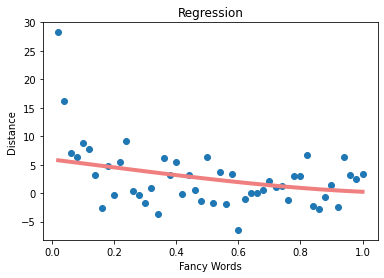

In [49]:
# Regression Plot
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X['Fancy Words'], y=y)
plt.plot(X['Fancy Words'], y_hat, color='lightcoral', linewidth='4')

plt.title('Regression')
plt.xlabel('Fancy Words')
plt.ylabel('Distance')

Text(0, 0.5, 'Difference')

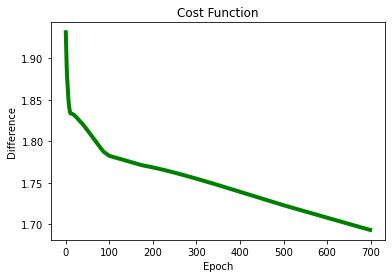

In [50]:
# Cost Plot
plt.figure()
plt.plot(list(range(0,700)), J, color='green', linewidth='4')

plt.title('Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Difference')